# Loading Data

In [16]:
data <- read.csv("D:/Research/keyword/Keyword/All/12 journals.csv")
nrow(data)
# str(data)
# head(data$abstract_ratio)
# sum(data[which(data$source.title=="computers and education"),"no_references"])

[1] 5875

# Transforming Variables

In [17]:
na_index <- which(is.na(data$cited.by))
na_index

class(data$quarter)
##data[na_index, "cited.by"] <- 0

integer(0)

[1] "factor"

# Data Cleaning

In [18]:
# nrow(data)
# summary(data$cited.by_scaled)

# data <- data[data$cited.by_scaled <4,]
# nrow(data)
# summary(data$cited.by_scaled)

In [25]:
# cited.by.table <- table(data$cited.by)
# # cited.by.table
# # round(prop.table(cited.by.table),2) # row percentages 
# rbind(cited.by.table,round(prop.table(cited.by.table),2))

# ##------------------------------------
# cited.by.table <- table(log(data$cited.by_zero))
# # cited.by.table
# # round(prop.table(cited.by.table),2) # row percentages 
# rbind(cited.by.table,round(prop.table(cited.by.table),2))

# Creating New Target Variables

In [4]:
# data$cited.by_zero <- 0


# for (row in 1:nrow(data))
# #     row=1
#     {if (data[row,"cited.by"] == 0  & !(is.na(data[row,"cited.by"])))
#     data[row,"cited.by_zero"] <- data[row,"cited.by"] + 0.5
#     else data[row,"cited.by_zero"] <- data[row,"cited.by"] }
     
#hist(log(data$cited.by_zero))
    
     
#hist   (log(data$cited.by_zero))
#barplot(log(data$cited.by_zero))


# Part 1: Linear Regression for all data points

In [20]:
pred_numeric <- c("abstract_length" ,"page.count","title_length", "abstract_ratio" ,"no_references","no_authors"
                  ,"numkeys", "cited.by", "article_age","weight_ratio")
pred_cat     <- c("quarter")
pred_data     <- data[,c(pred_numeric,pred_cat)]
nrow(data)

linear_reg   <- lm( yjPower(data$cited.by_scaled, 0, jacobian.adjusted = FALSE) ~ ., data=pred_data)
summary(linear_reg)

[1] 5875


Call:
lm(formula = yjPower(data$cited.by_scaled, 0, jacobian.adjusted = FALSE) ~ 
    ., data = pred_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6089 -0.2004 -0.0161  0.1894  2.0576 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -8.647e-01  3.469e-02 -24.928  < 2e-16 ***
abstract_length  2.323e-04  9.906e-05   2.345   0.0191 *  
page.count      -1.570e-02  1.424e-03 -11.028  < 2e-16 ***
title_length    -6.827e-04  1.234e-03  -0.553   0.5800    
abstract_ratio   4.938e-01  2.030e-01   2.432   0.0150 *  
no_references    2.912e-03  2.352e-04  12.382  < 2e-16 ***
no_authors       1.432e-02  3.650e-03   3.923 8.85e-05 ***
numkeys         -4.330e-04  4.003e-03  -0.108   0.9139    
cited.by         1.085e-02  1.545e-04  70.246  < 2e-16 ***
article_age      6.009e-02  1.785e-03  33.666  < 2e-16 ***
weight_ratio    -2.125e-02  1.633e-01  -0.130   0.8965    
quarterq2        3.483e-01  1.442e-02  24.156  < 2e-16 ***
quarterq3       

# Model Selection

In [26]:
# linear_reg_step <- step(linear_reg)
# linear_reg_step

In [15]:
# linear_reg_final <- lm(log(cited.by_zero) ~ page.count + abstract_ratio + 
#     no_references + article_age + source.title, data = pred_data)
# summary(linear_reg_final)

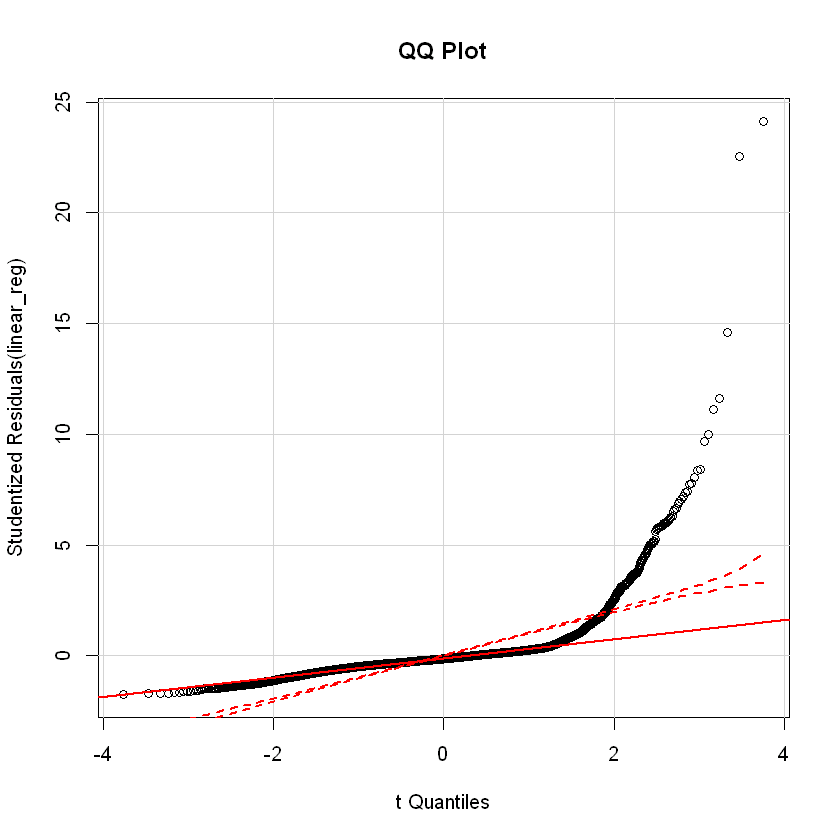

In [13]:
require(car,quietly=TRUE)
qqPlot(linear_reg, main="QQ Plot") #qq plot for studentized resid 
# qqPlot(linear_reg0, main="QQ Plot") #qq plot for studentized resid 


# Outlier Detection

In [18]:
# influenceIndexPlot <- influenceIndexPlot(linear_reg, id.n=10)
# str(influenceIndexPlot)
# outlierTest(linear_reg)
# # data[c(921,922,923),]

In [19]:
# # Influence Plot 
# influencePlot(linear_reg,	id.method="identify", main="Influence Plot", 
#               sub="Circle size is proportial to Cook's Distance",id.n=10 )

# Box-Cox Transformation

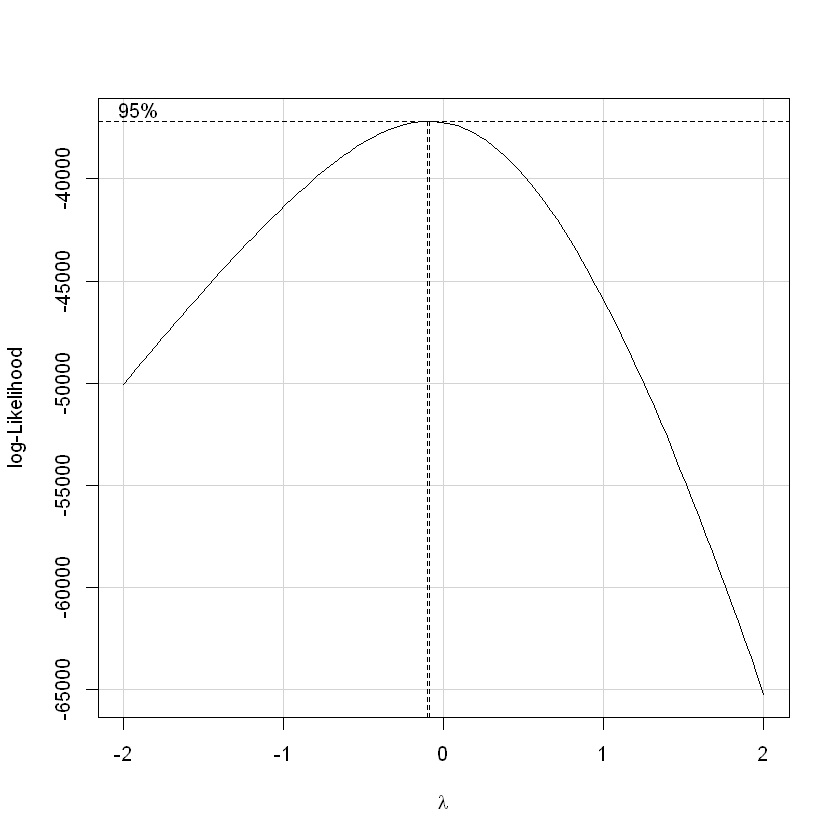

In [14]:
require(MASS, quietly=TRUE)
require(car, quietly=TRUE)

#bcPower(1:5,2)
boxCox <- boxCox(linear_reg, lambda = seq(-2, 2, by=0.1),family="yjPower")

#summary(powerTransform(linear_reg))

#bcPower(linear_reg)
# data$cited.by_zero[1:5]
# basicPower(data$cited.by_zero,lambda=0.05)[1:5]


# Multi-Collinearity

In [10]:
require(car,quietly=TRUE)
# Evaluate Collinearity

vif(linear_reg) # variance inflation factors 
# ??vif
sqrt(vif(linear_reg)) > 2 # problem?


,GVIF,Df,GVIF^(1/(2*Df))
abstract_length,1.145801,1.000000,1.070421
page.count,1.363017,1.000000,1.167483
title_length,1.056259,1.000000,1.027745
abstract_ratio,1.280214,1.000000,1.131466
no_references,1.377720,1.000000,1.173763
no_authors,1.115721,1.000000,1.056277
numkeys,1.112543,1.000000,1.054772
article_age,1.457681,1.000000,1.207344
weight_ratio,1.158060,1.000000,1.076132
quarter,1.447579,3.000000,1.063589


,GVIF,Df,GVIF^(1/(2*Df))
abstract_length,FALSE,FALSE,FALSE
page.count,FALSE,FALSE,FALSE
title_length,FALSE,FALSE,FALSE
abstract_ratio,FALSE,FALSE,FALSE
no_references,FALSE,FALSE,FALSE
no_authors,FALSE,FALSE,FALSE
numkeys,FALSE,FALSE,FALSE
article_age,FALSE,FALSE,FALSE
weight_ratio,FALSE,FALSE,FALSE
quarter,FALSE,FALSE,FALSE


In [24]:
confint(linear_reg)
confint(linear_reg2)

,2.5 %,97.5 %
(Intercept),-29.62181,-10.56558
abstract_length,-0.04850754,0.00531413
page.count,0.1711162,0.9559056
title_length,-0.4994959,0.1905774
abstract_ratio,25.23705,144.23139
no_references,0.05223696,0.21216736
no_authors,-1.167432,0.733121
numkeys,-0.6086713,1.7740303
article_age,2.705681,3.773041
source.titlecomputers and education,13.63812,24.34025


,2.5 %,97.5 %
(Intercept),-0.6995944,1.8189091
abstract_length,-0.0082046556,-0.0008581487
page.count,-0.0112961,0.0870356
title_length,-0.08170295,0.01303712
abstract_ratio,0.6229348,17.0929027
no_references,0.01208615,0.03218828
no_authors,-0.1400777,0.1206527
numkeys,-0.0738701,0.2560489
source.titlecomputers and education,2.681361,4.078556


In [11]:
# hist(log(data$cited.by+0.5))

In [40]:
save.image()